<a href="https://colab.research.google.com/github/SangatiNithyaSai/TheSparksFoundation/blob/main/GRIP_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME:SANGATI NITHYA SAI TEJA REDDY


#TASK1 Prediction using Supervised ML

Importing <b>Pandas</b> Module which helps in reading data,numpy for mathematical operations,and matplotlib for visualizing the data.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the data from the url.


In [ ]:

data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As the info shows us that there is no null values and we can see that the data does not have any anamolies,we can proceed without preprocessing.


Visualizing the data


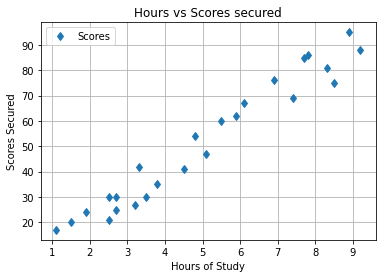

In [ ]:

data.plot(x='Hours',y='Scores',style='d')
plt.xlabel("Hours of Study")
plt.ylabel("Scores Secured")
plt.title("Hours vs Scores secured")
plt.grid(True)
plt.show()

The above graphs shows that score is directly proportional to the Study Hours,Let us find the regression line for this data.

## Preparing the data.

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

# Splitting the data for model training

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression  #importing LR model
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Training Done
Now we get the values like x-coefficient and y-intercept.
From this values we can see how the line fits for data.

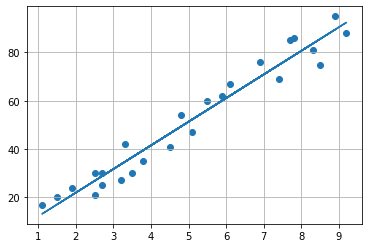

In [ ]:
line =reg.coef_*x+reg.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.grid(True)
plt.show()

In [ ]:
print(x_test)
y_pred=reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [ ]:
df=pd.DataFrame({"Actual":y_test,"predicted":y_pred})
print(df)

   Actual  predicted
0      20  17.053665
1      27  33.694229
2      69  74.806209
3      30  26.842232
4      62  60.123359
5      35  39.567369
6      24  20.969092
7      86  78.721636


The above data tells us with how much difference the model predicts.

#Finding the score secured for 9.25 study hours.


In [ ]:
hours= [[9.25]]
score=reg.predict(hours)
print("Hours Studied=",hours)
print("Score can be gained=",score)

Hours Studied= [[9.25]]
Score can be gained= [92.91505723]


In [ ]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_pred,y_test))

Mean Absolute Error: 4.419727808027651


Mean absolute error tells us about the difference with which the model predicts the output and the true values.